Calculating linear adiabatic stellar oscillations
---

**Contributors**: 
- [Earl Patrick Bellinger](https://earlbellinger.com), Stellar Astrophysics Centre, Aarhus University, Denmark
- [Warrick Ball](https://warrickball.github.io/), School of Physics and Astronomy, University of Birmingham, UK

**References**: 
- *J. Christensen-Dalsgaard, [Lecture Notes on Stellar Oscillations](http://astro.phys.au.dk/~jcd/oscilnotes/)*
- *R. H. Townsend, [GYRE Equations & Variables](https://bitbucket.org/rhdtownsend/gyre/src/tip/doc/equations.pdf)*
- *Press, Teukolsky, Vetterling, and Flannery, [Numerical Recipes in Fortran 77](https://websites.pmc.ucsc.edu/~fnimmo/eart290c_17/NumericalRecipesinF77.pdf)*

In [1]:
import numpy as np 
import pandas as pd
from scipy import integrate 
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", 
        palette="muted", 
        rc={"xtick.bottom" : True, "ytick.left" : True})
plt.style.use('matplotlibrc')

Begin by loading a stellar model; in this case, we will use JCD's Model S of the present Sun. 

In [3]:
modelS = pd.read_table('modelS.dat')
modelS = modelS.reindex(index=modelS.index[::-1]) # reverse, reverse!
modelS

,x,m,c2,u,Y,r,q,T,P,rho,...,r_X,Z,R_min_r,eps_g,L_g,X_He3,X_C12,X_C13,X_N14,X_O16
2481,1.436803e-60,1.989000e-27,2.546774e+15,1.526582e+15,0.642473,1.000000e-49,-1.381551e+02,1.566847e+07,2.349248e+17,1.538894e+02,...,-2.773489e-18,0.020313,6.959895e+10,-0.122841,0.0,0.000008,0.0,0.0,0.005131,0.009162
2480,1.391083e-03,5.849560e+26,2.546840e+15,1.526622e+15,0.642407,9.681792e+07,-1.503936e+01,1.566779e+07,2.348937e+17,1.538650e+02,...,-2.773025e-18,0.020313,6.950213e+10,-0.122841,0.0,0.000008,0.0,0.0,0.005131,0.009162
2479,1.409791e-03,6.088733e+26,2.546840e+15,1.526622e+15,0.642406,9.811996e+07,-1.499929e+01,1.566777e+07,2.348929e+17,1.538645e+02,...,-2.773007e-18,0.020313,6.950083e+10,-0.122835,0.0,0.000008,0.0,0.0,0.005131,0.009162
2478,1.428750e-03,6.337684e+26,2.546844e+15,1.526624e+15,0.642404,9.943950e+07,-1.495921e+01,1.566776e+07,2.348920e+17,1.538637e+02,...,-2.773000e-18,0.020313,6.949951e+10,-0.122843,0.0,0.000008,0.0,0.0,0.005131,0.009162
2477,1.447964e-03,6.596813e+26,2.546847e+15,1.526626e+15,0.642401,1.007768e+08,-1.491914e+01,1.566774e+07,2.348911e+17,1.538629e+02,...,-2.772992e-18,0.020313,6.949817e+10,-0.122844,0.0,0.000008,0.0,0.0,0.005131,0.009162
2476,1.467437e-03,6.866537e+26,2.546851e+15,1.526628e+15,0.642399,1.021321e+08,-1.487907e+01,1.566772e+07,2.348902e+17,1.538621e+02,...,-2.772985e-18,0.020313,6.949681e+10,-0.122841,0.0,0.000008,0.0,0.0,0.005131,0.009162
2475,1.487172e-03,7.147288e+26,2.546853e+15,1.526630e+15,0.642396,1.035056e+08,-1.483899e+01,1.566770e+07,2.348893e+17,1.538613e+02,...,-2.772978e-18,0.020313,6.949544e+10,-0.122842,0.0,0.000008,0.0,0.0,0.005131,0.009162
2474,1.507171e-03,7.439517e+26,2.546857e+15,1.526632e+15,0.642394,1.048975e+08,-1.479892e+01,1.566768e+07,2.348884e+17,1.538605e+02,...,-2.772969e-18,0.020313,6.949405e+10,-0.122843,0.0,0.000008,0.0,0.0,0.005131,0.009162
2473,1.527440e-03,7.743694e+26,2.546861e+15,1.526635e+15,0.642391,1.063082e+08,-1.475885e+01,1.566765e+07,2.348874e+17,1.538596e+02,...,-2.772960e-18,0.020313,6.949264e+10,-0.122845,0.0,0.000008,0.0,0.0,0.005131,0.009162
2472,1.547982e-03,8.060307e+26,2.546864e+15,1.526637e+15,0.642388,1.077379e+08,-1.471878e+01,1.566763e+07,2.348864e+17,1.538587e+02,...,-2.772951e-18,0.020313,6.949121e+10,-0.122845,0.0,0.000008,0.0,0.0,0.005131,0.009162


In [4]:
# constants 
# TODO: tie in with TOMSO and grab from fgong directly 
M = 1.989000000E+33 # g
R = 6.959894677E+10 # cm
G = 6.67428e-8

# coordinates 
r = modelS['r'].values
x = modelS['x'].values
m = modelS['m'].values

def spline(var_name):
    return InterpolatedUnivariateSpline(x, modelS[var_name].values)

# dimensional variables 
cs2    = spline('c2')
P      = spline('P')
rho    = spline('rho')
Gamma1 = spline('Gamma1')

# dimensionless mechanical variables 
Astar = spline('conv_stab')

c1    = r**3/R**3 * M/m
c1[0] = 1/(4.*np.pi*rho(x[0])/3) * M/R**3
#1[0] = 0
c1    = InterpolatedUnivariateSpline(x, c1)

V = -np.gradient(np.log(P(x)), np.log(r))
U = 4.*np.pi*r**3*rho(x)/m

V[0] = 0
U[0] = 3

V = InterpolatedUnivariateSpline(x, V)
U = InterpolatedUnivariateSpline(x, U)
Vg = lambda x: V(x)/Gamma1(x)

#g   = InterpolatedUnivariateSpline(x, G*m/r**2)
#N2  = lambda y: g(y) * InterpolatedUnivariateSpline(x, Astar)(y)

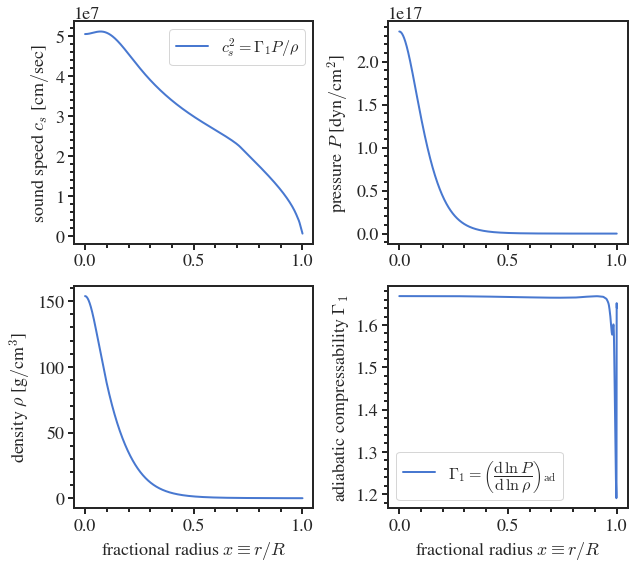

In [5]:
plt.figure(figsize=(9,8))

plt.subplot(221)
plt.plot(x, np.sqrt(cs2(x)),
        label=r'$c_s^2 = \Gamma_1 P/\rho$')
plt.legend()
plt.ylabel(r'sound speed $c_s$ [cm$/$sec]')

plt.subplot(222)
plt.plot(x, P(x))
plt.ylabel(r'pressure $P$ [dyn$/$cm$^2$]')

plt.subplot(223)
plt.plot(x, rho(x))
plt.xlabel(r'fractional radius $x\equiv r/R$')
plt.ylabel(r'density $\rho$ [g$/$cm$^3$]')

plt.subplot(224)
plt.plot(x, Gamma1(x),
        label=r'$\Gamma_1 = '\
         r'\left('\
             r'\dfrac{\mathrm{d}\,\ln\, P}{\mathrm{d}\,\ln\, \rho}'\
         r'\right)_{\mathrm{ad}}$')
plt.legend()
plt.xlabel(r'fractional radius $x\equiv r/R$')
plt.ylabel(r'adiabatic compressability $\Gamma_1$')

plt.tight_layout()
plt.show()

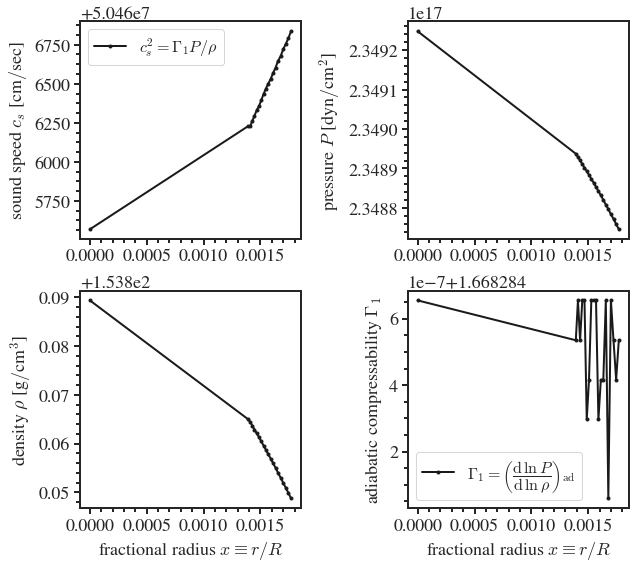

In [6]:
# zoom into the core 
x_ = x[:20]

plt.figure(figsize=(9,8))

plt.subplot(221)
plt.plot(x_, np.sqrt(cs2(x_)), 'k.-',
        label=r'$c_s^2 = \Gamma_1 P/\rho$')
plt.legend()
plt.ylabel(r'sound speed $c_s$ [cm$/$sec]')

plt.subplot(222)
plt.plot(x_, P(x_), 'k.-')
plt.ylabel(r'pressure $P$ [dyn$/$cm$^2$]')

plt.subplot(223)
plt.plot(x_, rho(x_), 'k.-')
plt.xlabel(r'fractional radius $x\equiv r/R$')
plt.ylabel(r'density $\rho$ [g$/$cm$^3$]')

plt.subplot(224)
plt.plot(x_, Gamma1(x_), 'k.-',
        label=r'$\Gamma_1 = '\
         r'\left('\
             r'\dfrac{\mathrm{d}\,\ln\, P}{\mathrm{d}\,\ln\, \rho}'\
         r'\right)_{\mathrm{ad}}$')
plt.legend()
plt.xlabel(r'fractional radius $x\equiv r/R$')
plt.ylabel(r'adiabatic compressability $\Gamma_1$')

plt.tight_layout()
plt.show()

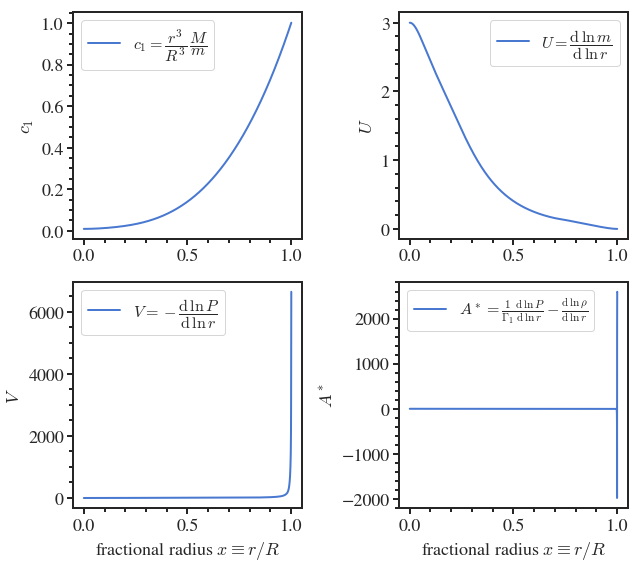

In [7]:
plt.figure(figsize=(9,8))

plt.subplot(221)
plt.plot(x, c1(x), 
         label=r'$c_1 = \dfrac{r^3}{R^3} \, \dfrac{M}{m}$')
plt.legend()
plt.ylabel(r'$c_1$')

plt.subplot(222)
plt.plot(x, U(x),
        label=r'$U=\dfrac{\mathrm{d}\, \ln \, m}{\mathrm{d}\, \ln\, r}$')
plt.legend()
plt.ylabel(r'$U$')

plt.subplot(223)
plt.plot(x, V(x),
        label=r'$V=-\dfrac{\mathrm{d}\, \ln\, P}{\mathrm{d}\, \ln\, r}$')
plt.legend()
plt.xlabel(r'fractional radius $x\equiv r/R$')
plt.ylabel(r'$V$')

plt.subplot(224)
plt.plot(x, Astar(x),
        label=r'$A^\ast = \frac{1}{\Gamma_1}'\
         r'\frac{\mathrm{d}\,\ln\,P}{\mathrm{d}\,\ln\,r} - '\
         r'\frac{\mathrm{d}\,\ln\,\rho}{\mathrm{d}\,\ln\,r}$')
plt.legend()
plt.xlabel(r'fractional radius $x\equiv r/R$')
plt.ylabel(r'$A^\ast$')

plt.tight_layout()
plt.show()

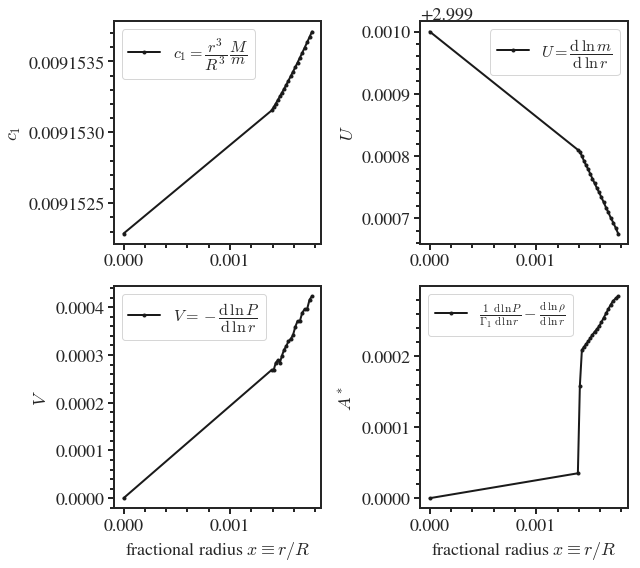

In [8]:
plt.figure(figsize=(9,8))

plt.subplot(221)
plt.plot(x_, c1(x_), 'k.-',
         label=r'$c_1 = \dfrac{r^3}{R^3} \, \dfrac{M}{m}$')
plt.legend()
plt.ylabel(r'$c_1$')

plt.subplot(222)
plt.plot(x_, U(x_), 'k.-',
        label=r'$U=\dfrac{\mathrm{d}\, \ln \, m}{\mathrm{d}\, \ln\, r}$')
plt.legend()
plt.ylabel(r'$U$')

plt.subplot(223)
plt.plot(x_, V(x_), 'k.-',
        label=r'$V=-\dfrac{\mathrm{d}\, \ln\, P}{\mathrm{d}\, \ln\, r}$')
plt.legend()
plt.xlabel(r'fractional radius $x\equiv r/R$')
plt.ylabel(r'$V$')

plt.subplot(224)
plt.plot(x_, Astar(x_), 'k.-',
        label=r'$\frac{1}{\Gamma_1}'\
         r'\frac{\mathrm{d}\,\ln\,P}{\mathrm{d}\,\ln\,r} - '\
         r'\frac{\mathrm{d}\,\ln\,\rho}{\mathrm{d}\,\ln\,r}$')
plt.legend()
plt.xlabel(r'fractional radius $x\equiv r/R$')
plt.ylabel(r'$A^\ast$')

plt.tight_layout()
plt.show()

Radial oscillations
---

**Reference**: *R. H. Townsend, [GYRE Equations & Variables](https://bitbucket.org/rhdtownsend/gyre/src/tip/doc/equations.pdf)*

Define dimensionless variables 
\begin{align}
    x &= \frac{r}{R_\ast} \\
    y_1 &= x^2 \frac{\xi_r}{r} \\
    y_2 &= x^2 \frac{P'}{\rho g r}
\end{align}

Then solve the system of equations
\begin{align}
    x \frac{\text{d}y_1}{\text{d}x}
    &=
    \left(
        \frac{V}{\Gamma_1}
        -
        1
    \right)
    y_1
    +
    \frac{V}{\Gamma_1} y_2\\
    x \frac{\text{d}y_2}{\text{d}x}
    &=
    \left(
        c_1 \omega^2
        +
        U
        -
        A^*
    \right)
    y_1
    +
    \left(
        3
        -
        U
        +
        A^*
    \right)
    y_2
\end{align}
with a regularity-enforcing inner boundary condition:
\begin{equation}
    c_1 \omega^2 y_1 = \ell y_2
\end{equation}
and the vacuum surface pressure condition at the outer boundary:
\begin{equation}
    y_1 - y_2 = 0.
\end{equation}

In [9]:
nu = 3090
nu = 0.3998014585387239E+004 # l = 0, n = 28
omega = 2.*np.pi*nu*10**-6*np.sqrt(R**3/G/M)
omega

40.032124728286185

In [10]:
def radial(x, y):
    if x == 0:
        return np.vstack((0, 0))
    dy1_dx = (Vg(x) - 1) * y[0] - \
              Vg(x)      * y[1]
    dy2_dx = (c1(x) * omega**2 + U(x) - Astar(x)) * y[0] + \
             (3                - U(x) + Astar(x)) * y[1]
    return np.vstack((dy1_dx/x, dy2_dx/x))

**Shooting method**
- Treat as an initial value problem and integrate outward from the core boundary condition 
- Guess the unconstrained inner boundary and optimize it 
- The eigenfrequencies are the solutions $\omega$ that satisfy the surface boundary condition 

In [11]:
# y1 = 0 at the inner boundary 
# guess an inner boundary for y2 
y2_0 = 0.8058888323526826E+000

In [12]:
res = integrate.solve_ivp(
    fun=radial, 
    t_span=(0, x[-1]),
    y0=[0, y2_0],
    vectorized=True,
    method='RK45',
    atol=1e-9,
    rtol=1e-9,
    t_eval=x)

In [13]:
res

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 11648
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([1.43680335e-60, 1.39108313e-03, 1.40979085e-03, ...,
       1.00069676e+00, 1.00070468e+00, 1.00071255e+00])
 t_events: None
        y: array([[-3.75449693e-111, -2.09206324e-003, -2.06566151e-003, ...,
         1.71670091e+004,  1.72218031e+004,  1.72719782e+004],
       [ 8.05888832e-001,  6.37259699e-001,  6.36771547e-001, ...,
         1.53899210e+004,  1.55738661e+004,  1.57597528e+004]])

In [14]:
# outer boundary condition: y1=y2
res.y[0,-1] - res.y[1,-1]

1512.2254639214461

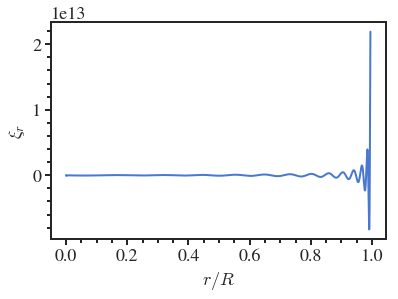

In [15]:
xi_r = res.y[0] * r / x**2
xi_r[0] = 0
#plt.plot(res.t, res.y[0])
plt.plot(res.t[:-500], xi_r[:-500])
#plt.plot(res.t, xi_r)
plt.xlabel(r'$r/R$')
plt.ylabel(r'$\xi_r$')
plt.show()

Compare with the results from GYRE

In [16]:
eig = pd.read_table('modelS-gyre/00028-000_+00028', skiprows=5, sep='\\s+')
eig

,M_r,x,Re(xi_r),Im(xi_r),Re(xi_h),Im(xi_h),Re(eul_P),Im(eul_P),Re(y_1),Im(y_1),Re(y_2),Im(y_2)
0,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,1.100142e+02,0.0,0.000000,-0.0,0.805889,-0.0
1,5.849560e+26,0.001391,-0.019823,0.0,0.0,0.0,1.099306e+02,0.0,-0.000028,0.0,0.805374,-0.0
2,6.088733e+26,0.001410,-0.020517,0.0,0.0,0.0,1.099298e+02,0.0,-0.000029,0.0,0.805370,-0.0
3,6.337684e+26,0.001429,-0.021209,0.0,0.0,0.0,1.099290e+02,0.0,-0.000030,0.0,0.805367,-0.0
4,6.596813e+26,0.001448,-0.021899,0.0,0.0,0.0,1.099282e+02,0.0,-0.000032,0.0,0.805364,-0.0
5,6.866537e+26,0.001467,-0.022588,0.0,0.0,0.0,1.099273e+02,0.0,-0.000033,0.0,0.805361,-0.0
6,7.147288e+26,0.001487,-0.023276,0.0,0.0,0.0,1.099264e+02,0.0,-0.000035,0.0,0.805358,-0.0
7,7.439517e+26,0.001507,-0.023962,0.0,0.0,0.0,1.099254e+02,0.0,-0.000036,0.0,0.805354,-0.0
8,7.743694e+26,0.001527,-0.024649,0.0,0.0,0.0,1.099244e+02,0.0,-0.000038,0.0,0.805351,-0.0
9,8.060307e+26,0.001548,-0.025334,0.0,0.0,0.0,1.099234e+02,0.0,-0.000039,0.0,0.805347,-0.0


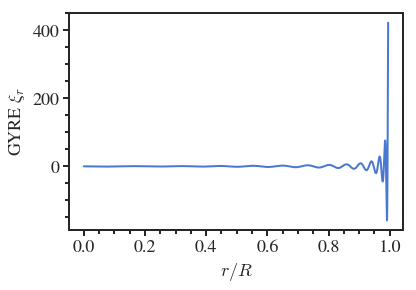

In [17]:
plt.plot(eig['x'][:-500], eig['Re(xi_r)'][:-500])
plt.xlabel(r'$r/R$')
plt.ylabel(r'GYRE $\xi_r$')
plt.show()

In [ ]:
# TODO:

# optimize y2(core) to improve y1(surf)-y2(surf)

# implement double shooting 
#     (i.e., integrate from the surface inward to some fitting point)

# try many values of omega, 
#     find where the outer bc changes sign, 
#     run a root finder on omega 

Cowling approximation
---

Assume $\Phi'=0$ and neglect small terms. Then the system reduces to a system of differential equations for $\xi_r$:
\begin{equation}
    \frac{\text{d}\xi_r}{\text{d}r}
    =
    \frac{1}{\rho c^2}
    \left(
        \frac{S_\ell^2}{\omega^2}
        -
        1
    \right)
    P'
\end{equation}
\begin{equation}
    \frac{\text{d}P'}{\text{d}r}
    =
    \rho
    \left(
        \omega^2 - N^2
    \right)
    \xi_r
\end{equation}
where
\begin{equation}
    N^2
    =
    g
    \left(
        \frac{1}{\Gamma_1 P}
        \frac{\text{d}P}{\text{d}r}
        -
        \frac{1}{\rho}
        \frac{\text{d}\rho}{\text{d}r}
    \right)
\end{equation}
\begin{equation}
    S_\ell^2
    =
    \frac{\ell(\ell+1)c^2}{r^2}
\end{equation}
subject to the boundary conditions 
\begin{equation}
    \xi_r \simeq \ell \xi_h \qquad \text{for }r \rightarrow 0\text{ when }\ell > 0
\end{equation}
\begin{equation}
    \delta P
    =
    P'
    +
    \xi_r
    \frac{\text{d}P}{\text{d}r}
    =
    0
    \qquad\text{at }r=R
\end{equation}
where
\begin{equation}
    \xi_h(r)
    =
    \frac{1}{r\omega^2}
    \left(
        \frac{P'}{\rho} + \Phi'
    \right)
    \qquad
    \Rightarrow
    \qquad
    \xi_h
    =
    \frac{1}{r\omega^2}
    \frac{P'}{\rho}
\end{equation}

In [ ]:
dP_dR_surf = np.gradient(P(x), r)[-1]
dP_dR_surf

In [ ]:
# TODO 

def cowling(x, y):
    # x is the position in the star 
    # y contains the radial displacement eigenfunction 
    #   as well as the perturbed pressure 
    #print(x.shape, y.shape)
    xi_r   = y[0]
    Pp     = y[1]
    
    S2 = ell * (ell + 1) * cs2(x) / x**2
    d_xi_r = 1/(rho(x) * cs2(x)) * (S2 / omega**2 - 1) * Pp
    d_Pp   = rho(x) * (omega**2 - N2(x)) * xi_r
    return np.vstack((d_xi_r, d_Pp))

def cowling_bcs(ya, yb):
    xi_r_core = ya[0]
    xi_r_surf = yb[0]
    Pp_core   = ya[1]
    Pp_surf   = yb[1]
    core_bc   = ell / (r[0] * omega**2) * Pp_core / rho(r[0])
    surf_bc   = Pp_surf + xi_r_surf * dP_dR_surf
    return np.array([core_bc, surf_bc])

In [ ]:
ell = 1
omega = 10

In [ ]:
xi_r_core = x[0]**(ell-1)
Pp_core   = x[0]**ell

res = integrate.solve_ivp(
    fun=cowling, 
    t_span=(x[0], x[-1]),
    y0=[xi_r_core, Pp_core],
    vectorized=True,
    t_eval=x)

In [ ]:
y_init = np.ones((2, x.size))
res = integrate.solve_bvp(cowling, cowling_bcs, x, y_init, 
                          max_nodes=10000, tol=1e-3)

Full set of equations
---

Search for non-trivial eigenfrequencies $\omega$ to the two-point boundary value problem: 
\begin{equation}
    \frac{\text{d}\xi_r}{\text{d}r}
    =
    -\left(
        \frac{2}{r}
        +
        \frac{1}{\Gamma_1 P}
        \frac{\text{d}P}{\text{d}r}
    \right)
    \xi_r
    +
    \frac{1}{\rho c^2}
    \left(
        \frac{S_\ell^2}{\omega^2}
        -
        1
    \right)
    P'
    +
    \frac{\ell(\ell+1)}{\omega^2 r^2}
    \Phi'
\end{equation}
\begin{equation}
    \frac{\text{d}P'}{\text{d}r}
    =
    \rho
    \left(
        \omega^2
        -
        N^2
    \right)
    \xi_r
    +
    \frac{1}{\Gamma_1 P}
    \frac{\text{d}P}{\text{d}r}
    P'
    -
    \rho
    \frac{\text{d}\Phi'}{\text{d}r}
\end{equation}
\begin{equation}
    \frac{1}{r^2}
    \frac{\text{d}}{\text{d}r} \left(
        r^2
        \frac{\text{d}\Phi'}{\text{d}r}
    \right)
    =
    4\pi G
    \left(
        \frac{P'}{c^2}
        +
        \frac{\rho \xi_r}{g}
        N^2
    \right)
    +
    \frac{\ell(\ell+1)}{r^2}
    \Phi'
\end{equation}
subject to the boundary conditions 
\begin{equation}
    \xi_r \simeq \ell \xi_h \qquad \text{for }r \rightarrow 0\text{ when }\ell > 0
\end{equation}
\begin{equation}
    \frac{\text{d}\Phi'}{\text{d}r}
    +
    \frac{\ell+1}{r}
    \Phi'
    =
    0\qquad\text{at }r=R
\end{equation}
\begin{equation}
    \delta P
    =
    P'
    +
    \xi_r
    \frac{\text{d}P}{\text{d}r}
    =
    0
    \qquad\text{at }r=R
\end{equation}

In [ ]:
# TODO 